<a href="https://colab.research.google.com/github/aswinina/Aswini_Metro_traffic/blob/main/Aswini_ML_Metro_interstate_traffic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import all required libraries for reading, analysing and visualizing data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

from sklearn.preprocessing import LabelEncoder

In [ ]:
#importing data
train_df = pd.read_csv('/content/drive/MyDrive/Metro_Interstate_Traffic_Volume.csv')
train_df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


**Data Description and stats**

In [ ]:
print('Dataset shape: ', train_df.shape)

Dataset shape:  (48204, 13)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  int64         
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
 9   time                 48204 non-null  int64         
 10  month                48204 non-null  int64         
 11  year                 48204 non-null  int64         
 12  day                  48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3

In [ ]:
train_df.describe(include = 'all')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,48204,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,12,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-05-19 10:00:00,NaN
freq,48143,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000


In [ ]:
train_df.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
time                   0
month                  0
year                   0
day                    0
dtype: int64

**DATA CLEANING**

In [ ]:
# convert the date_time column to datetime type
train_df['date_time'] = pd.to_datetime(train_df['date_time'])

In [ ]:
train_df['time'] = train_df['date_time'].dt.hour
train_df['month'] = train_df['date_time'].dt.month
train_df['year'] = train_df['date_time'].dt.year
train_df['day'] = train_df['date_time'].dt.day_name()

In [ ]:
train_df['holiday'].value_counts()

None                         48143
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: holiday, dtype: int64

In [ ]:
z = lambda x: False if x == 'None' else True
train_df['holiday'] = train_df['holiday'].apply(z)

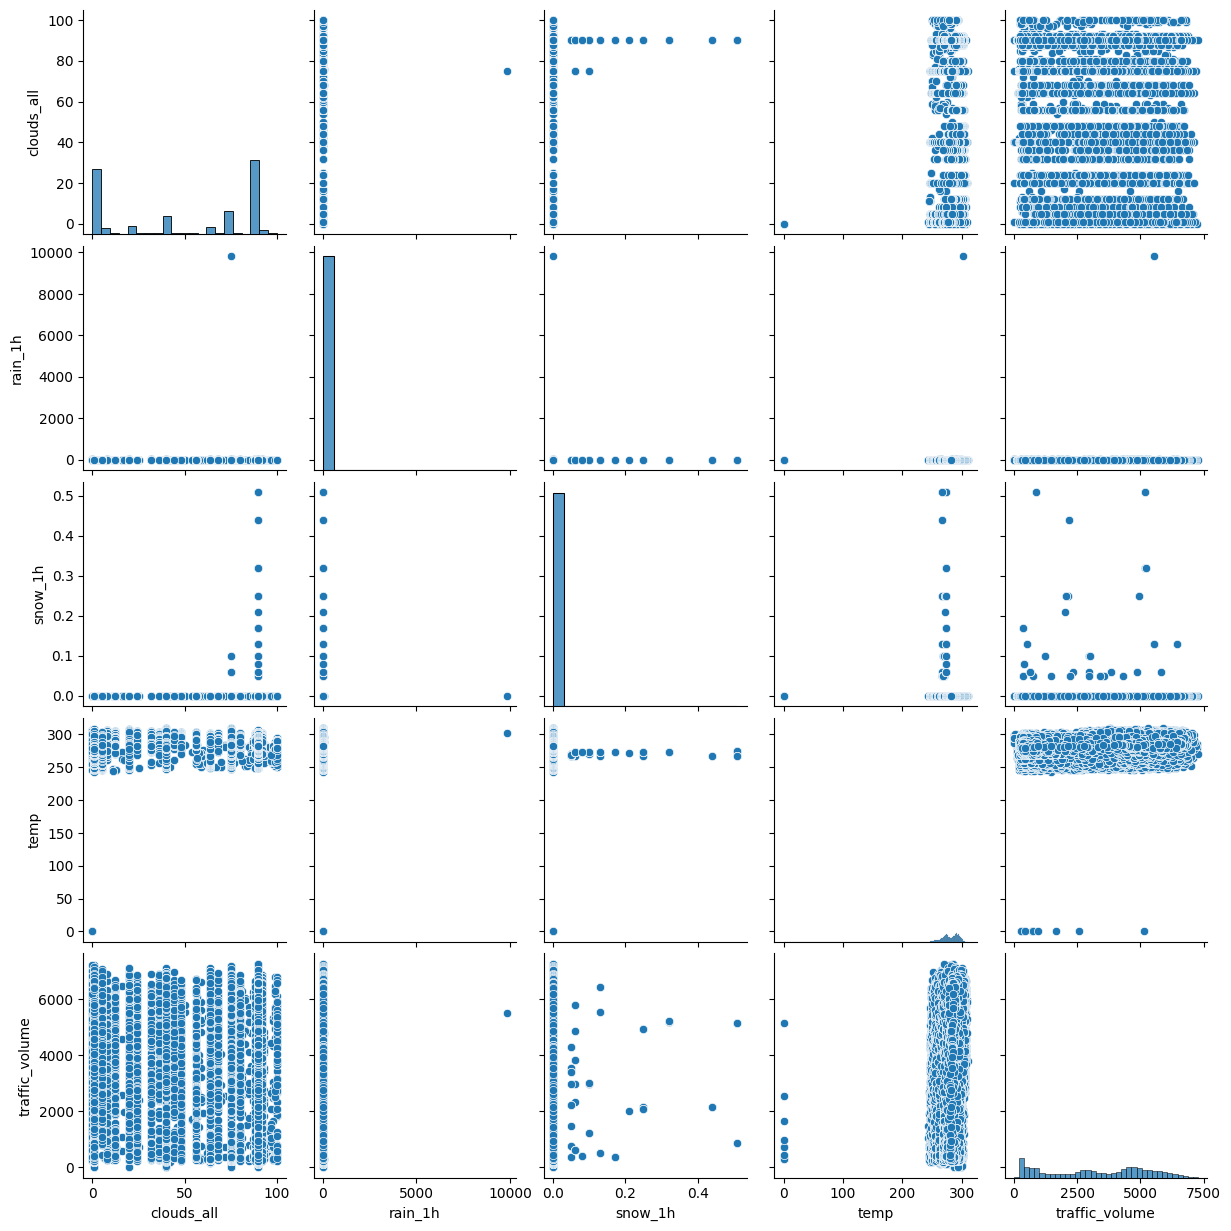

In [ ]:
cols =['clouds_all','rain_1h','snow_1h','temp','traffic_volume']
sns.pairplot(train_df[cols])
plt.show()

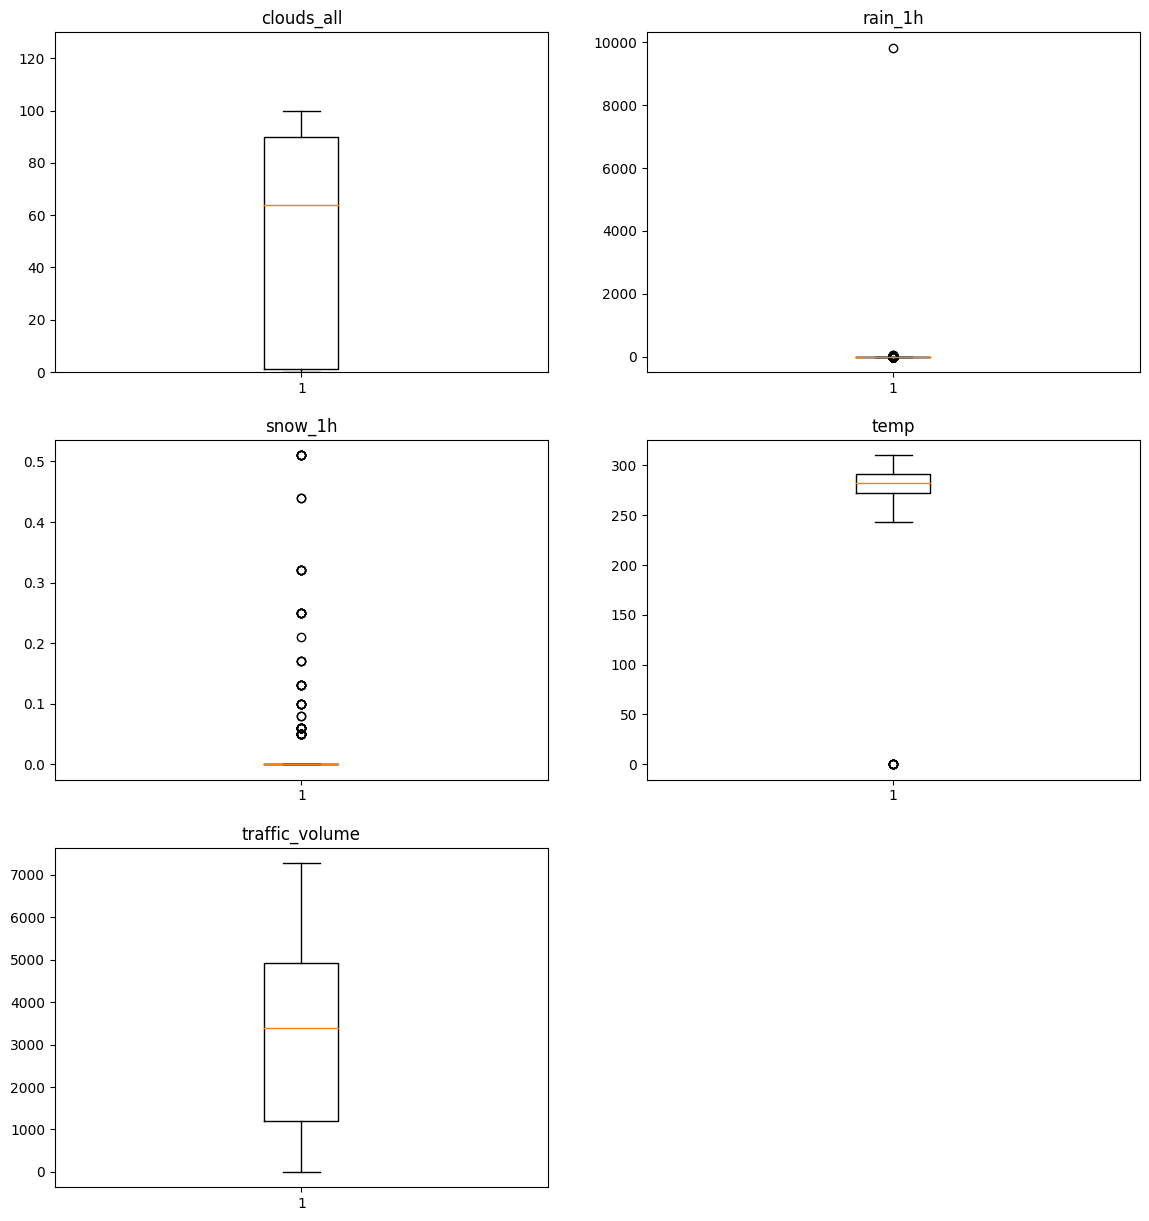

In [ ]:
plt.figure(figsize=(14,15))
plt.subplot(3,2,1)
plt.boxplot(train_df['clouds_all'])
plt.ylim(0,130)
plt.title('clouds_all')

plt.subplot(3,2,2)
plt.boxplot(train_df['rain_1h'])
plt.title('rain_1h')

plt.subplot(3,2,3)
plt.boxplot(train_df['snow_1h'])
plt.title('snow_1h')

plt.subplot(3,2,4)
plt.boxplot(train_df['temp'])
plt.title('temp')

plt.subplot(3,2,5)
plt.boxplot(train_df['traffic_volume'])
plt.title('traffic_volume')

plt.show()

In [ ]:
train_df = train_df[train_df['temp'] != 0]

In [ ]:
train_df = train_df[train_df.rain_1h < 100]

**DATA VISUALIZATION**

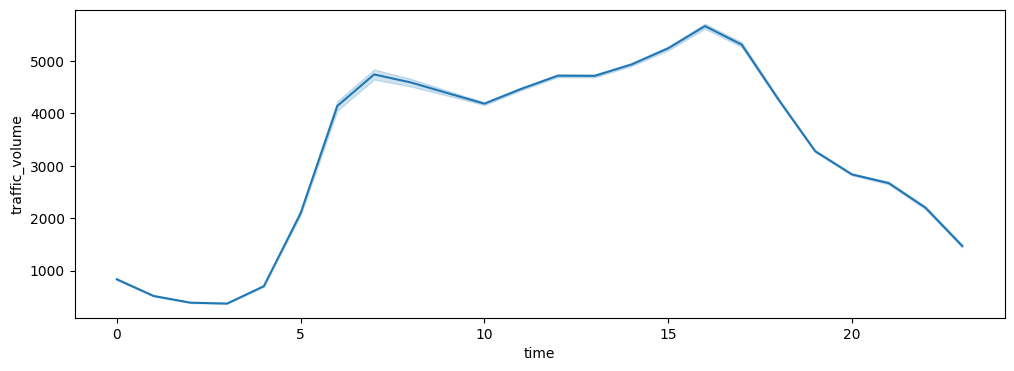

In [ ]:
fig, (axis2) = plt.subplots( 1, figsize = (12,4))
sns.lineplot(x = 'time', y = 'traffic_volume', data = train_df, ax = axis2);
plt.show()

This indicates that metro is busiest in between afternoon and evening

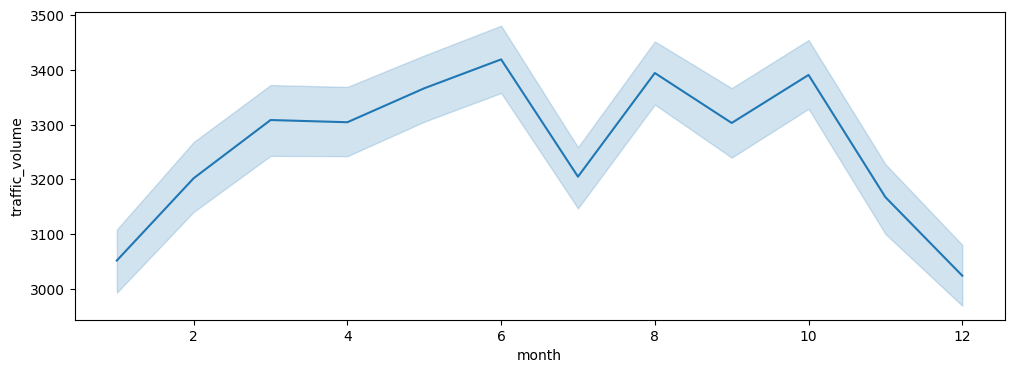

In [ ]:
fig, (axis2) = plt.subplots( 1, figsize = (12,4))
sns.lineplot(x = 'month', y = 'traffic_volume', data = train_df, ax = axis2);
plt.show()

June ,August,October are the busiest months

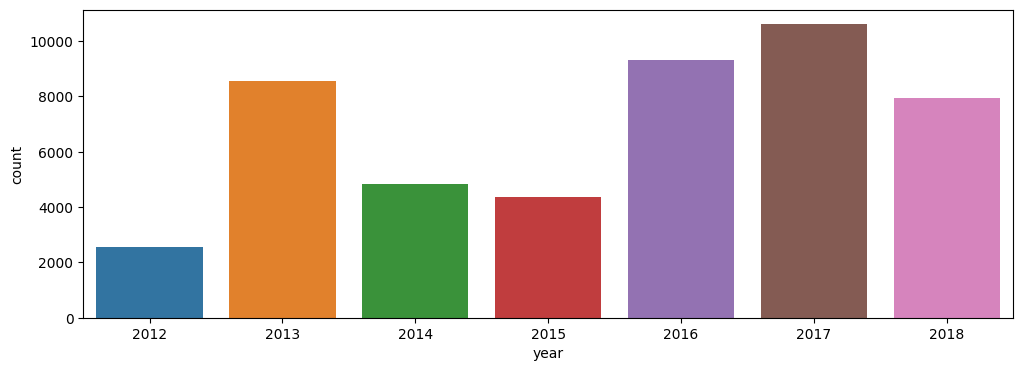

In [ ]:
fig, (axis1) = plt.subplots(1,  figsize = (12,4))
sns.countplot(x = 'year', data = train_df, ax = axis1)
plt.show()

**2017 turned out to be full capacitied month for us metro**

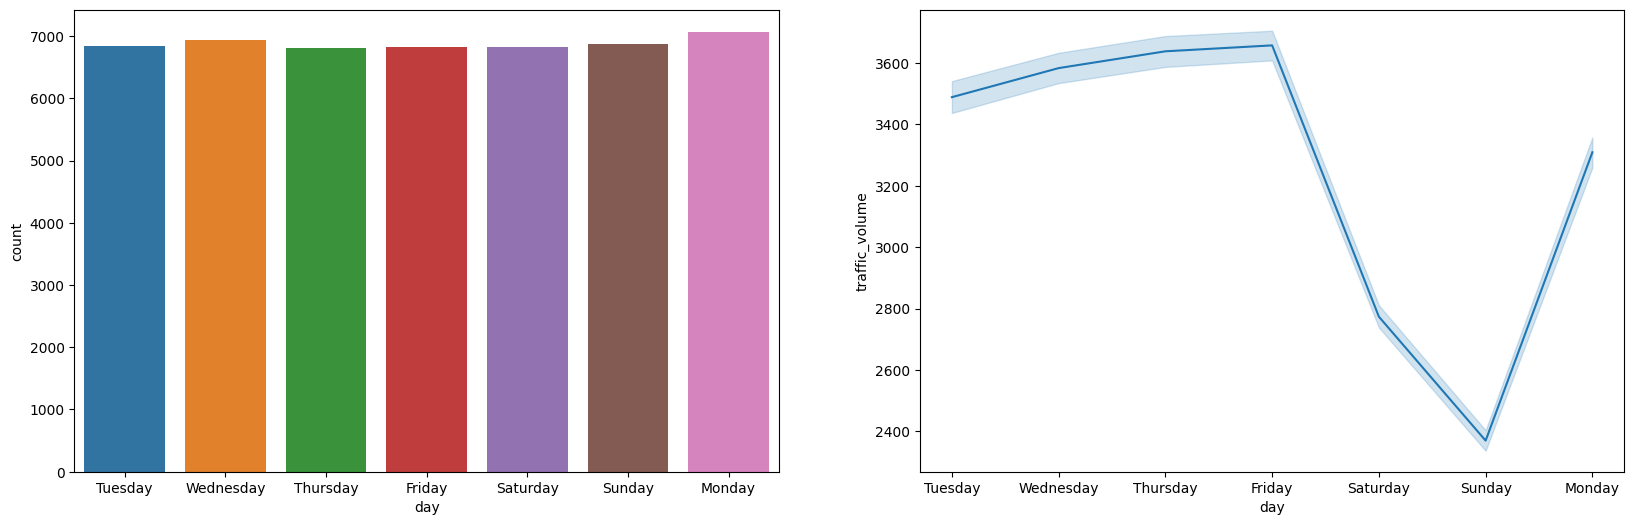

In [ ]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (20,6))
sns.countplot(x = 'day', data = train_df, ax = axis1)
sns.lineplot(x = 'day', y = 'traffic_volume', data = train_df, ax = axis2);
plt.show()

Metro were least used on Wednesday

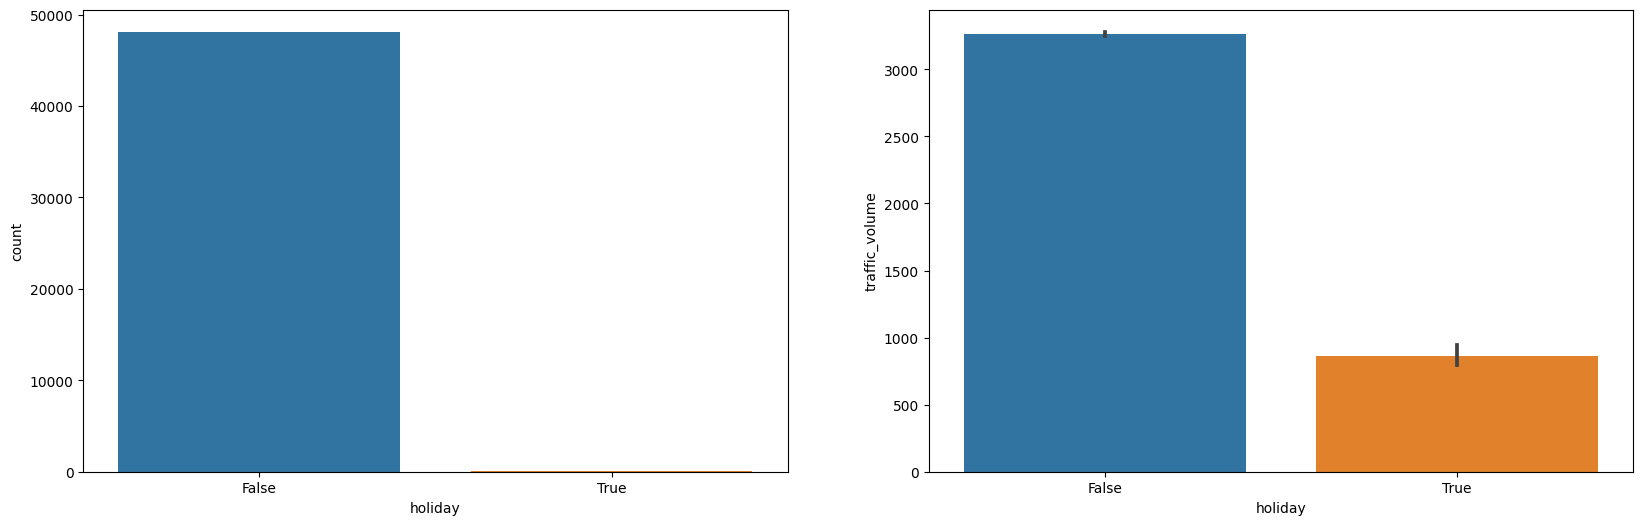

In [ ]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (20,6))
sns.countplot(x = 'holiday', data = train_df, ax = axis1)
sns.barplot(x = 'holiday', y = 'traffic_volume', data = train_df, ax = axis2);
plt.show()

Metros were used more on working days rather than on holidays

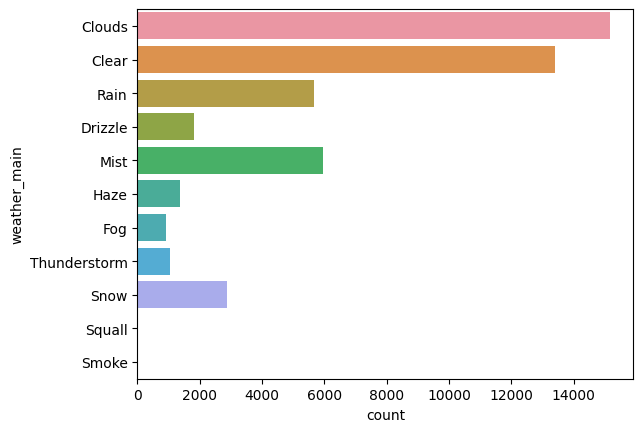

In [ ]:
#exploring different categories in weather_main
df=pd.read_csv('/content/drive/MyDrive/Metro_Interstate_Traffic_Volume.csv')
sns.countplot(y='weather_main', data=df)
plt.show()

It indicates that climate in us is mostly cloudy and clear

<ipython-input-17-02d9743c3ed1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot = True);


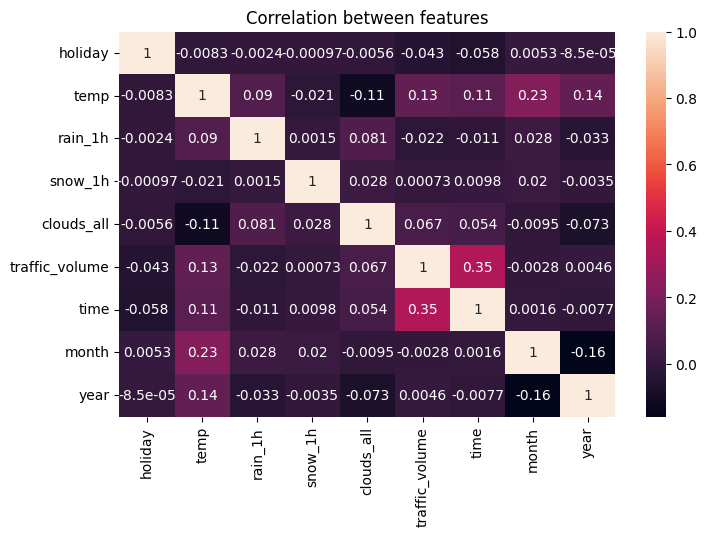

In [ ]:
plt.figure(figsize=(8, 5))
plt.title('Correlation between features')
sns.heatmap(train_df.corr(), annot = True);
plt.show()

Nearly no Correlation between fields

In [ ]:
train_df.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

**PRE PROCESSING**

In [ ]:
# drop the unrequired columns
train_df.drop(['date_time', 'weather_description'], axis = 1, inplace = True)

In [ ]:
# convert values of day column to numerical format
encoder = LabelEncoder()
train_df['day'] = encoder.fit_transform(train_df['day'])

In [ ]:
# subtract 242 from the temp column as there is no temperature below it
train_df['temp'] = train_df['temp'] - 242

In [ ]:
# convert the values of weather_main column to numerical format
encoder = LabelEncoder()
train_df['weather_main'] = encoder.fit_transform(train_df['weather_main'])

In [ ]:
train_df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,traffic_volume
0,None,46.28,0.0,0.0,40,1,5545
1,None,47.36,0.0,0.0,75,1,4516
2,None,47.58,0.0,0.0,90,1,4767
3,None,48.13,0.0,0.0,90,1,5026
4,None,49.14,0.0,0.0,75,1,4918
...,...,...,...,...,...,...,...
48199,None,41.45,0.0,0.0,75,1,3543
48200,None,40.76,0.0,0.0,90,1,2781
48201,None,40.73,0.0,0.0,90,10,2159
48202,None,40.09,0.0,0.0,90,1,1450


**ML MODELS**

In [ ]:
# import the required modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import math

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Assuming train_df is your DataFrame
X = train_df.drop(['traffic_volume'], axis=1).values
Y = train_df['traffic_volume'].values

# Scale the values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_val shape:", X_val.shape)
print("Y_val shape:", Y_val.shape)
non_numeric_cols = train_df.select_dtypes(exclude='number').columns.tolist()

X_train shape: (38554, 10)
Y_train shape: (38554,)
X_val shape: (9639, 10)
Y_val shape: (9639,)


In [ ]:
# DataFrame to store the RMSE scores of various algorithms
results = pd.DataFrame(columns = ['RMSE'])

In [ ]:
# helper function to evaluate a model
def evaluate_model(regressor, name):
    # train and test scores
    train_score = round(regressor.score(X_train, Y_train), 2)
    val_score = round(regressor.score(X_val, Y_val), 2)
    # predicted output
    Y_pred = regressor.predict(X_val)

    print(name + ' Train score: ', train_score)
    print(name + 'Test score: ', val_score)
    print('Root Mean Squared error: ', sqrt(mean_squared_error(Y_val, Y_pred)))
    print('Coefficient of determination: ', r2_score(Y_val, Y_pred))

    # add the current RMSE to the scores list
    results.loc[name] = sqrt(mean_squared_error(Y_val, Y_pred))

    # plot predicted vs true values
    x_points=np.linspace(0,8e3)
    plt.figure(figsize=(12,5))
    plt.plot(x_points, x_points, color='r')
    plt.scatter(Y_val, Y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True Values Vs Predicted Values');
    plt.show()

In [ ]:
lireg = LinearRegression()
lireg.fit(X_train, Y_train)

LinearRegression()

Linear Regression Train score:  0.14
Linear RegressionTest score:  0.14
Root Mean Squared error:  1839.9259702607728
Coefficient of determination:  0.13929721346929613


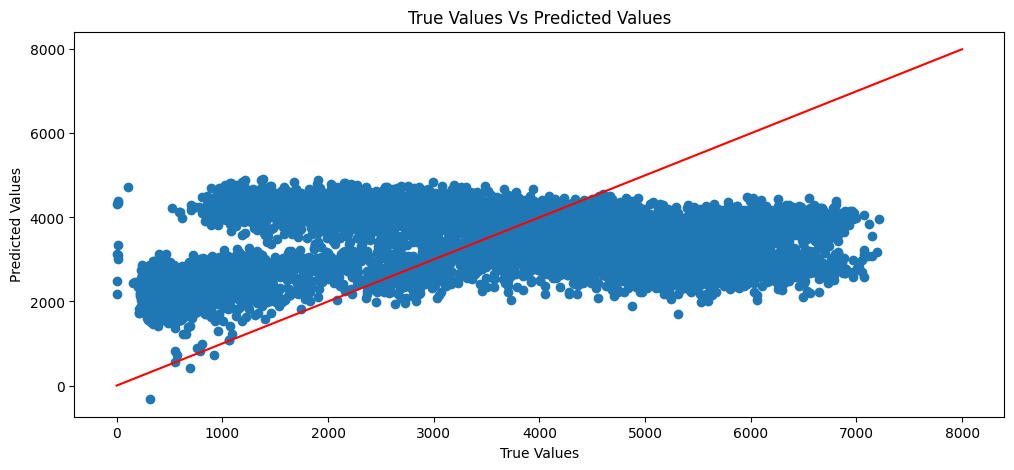

In [ ]:
# evaluate the Regressor
evaluate_model(lireg, 'Linear Regression')

In [ ]:
dtreg = DecisionTreeRegressor(max_depth = 12)
dtreg.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=12)

Decision Tree Train score:  0.96
Decision TreeTest score:  0.94
Root Mean Squared error:  486.57905888665755
Coefficient of determination:  0.9398051497657667


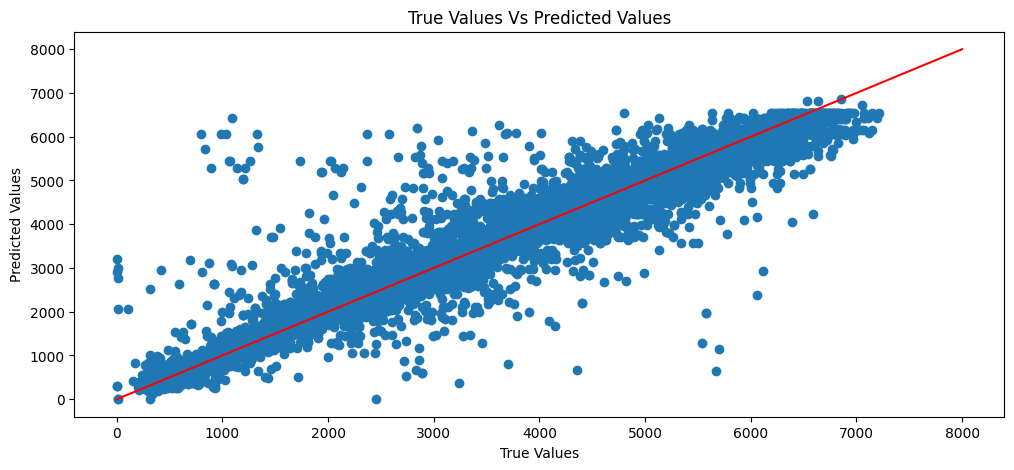

In [ ]:
# EVALUATING DECISION TREE
evaluate_model(dtreg,'Decision Tree')

In [ ]:
# n_estimators - The number of trees in the forest.
# min_samples_split - The minimum number of samples required to split an internal node
rfreg = RandomForestRegressor(n_estimators = 50, max_depth = 12, min_samples_split = 5)
rfreg.fit(X_train, Y_train)


RandomForestRegressor(max_depth=12, min_samples_split=5, n_estimators=50)

Random Forest Train score:  0.96
Random ForestTest score:  0.95
Root Mean Squared error:  439.38804236589164
Coefficient of determination:  0.9509149794038111


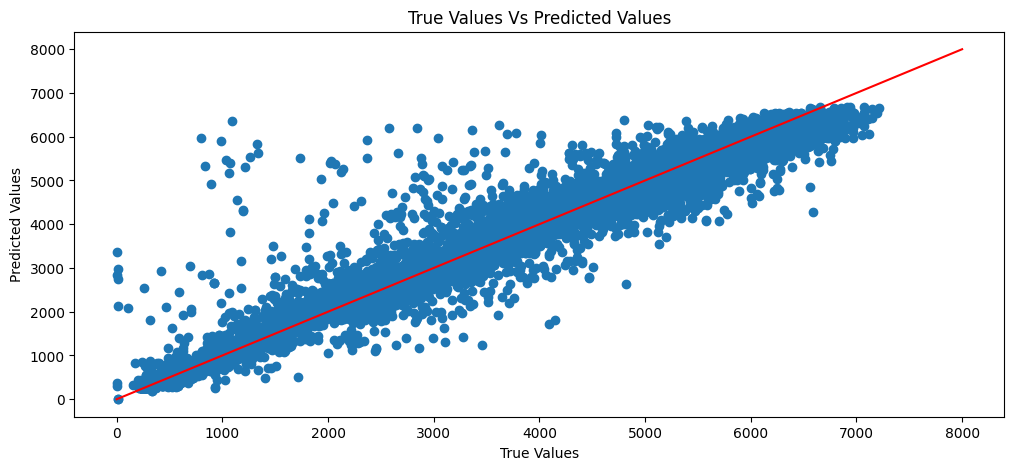

In [ ]:
# evaluate the Regressor
evaluate_model(rfreg, 'Random Forest')

In [ ]:
### Using Gradient Boosting

# n_estimators - The number of boosting stages to perform.
# max_depth - maximum depth of the individual regression estimators.
gbreg = GradientBoostingRegressor(n_estimators=500, max_depth=10)
gbreg.fit(X_train, Y_train)


GradientBoostingRegressor(max_depth=10, n_estimators=500)

Gradient Boosting Train score:  1.0
Gradient BoostingTest score:  0.97
Root Mean Squared error:  358.3437555917149
Coefficient of determination:  0.9673523299955055


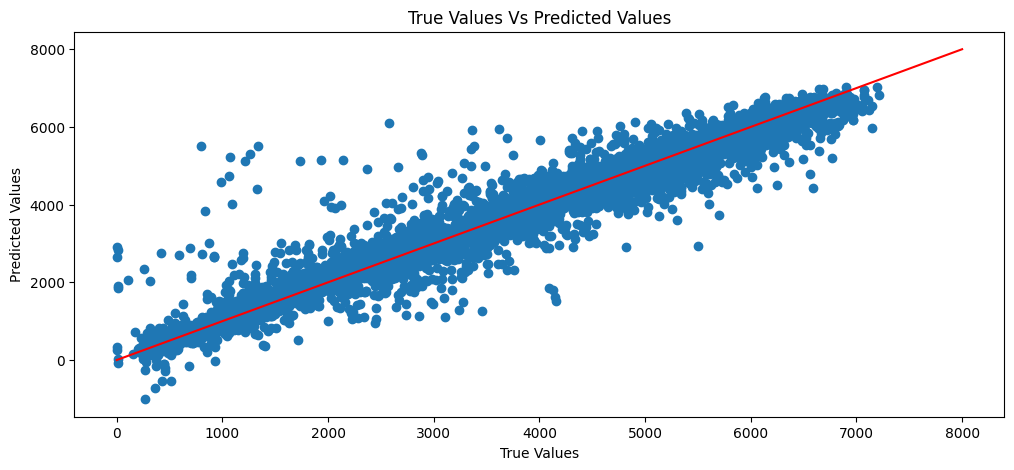

In [ ]:

# evaluate the Regressor
evaluate_model(gbreg, 'Gradient Boosting')

In [ ]:
#XGBOOST REGRESSOR
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
xgb_model.fit(X_train, Y_train)


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

XG Boost Train score:  0.93
XG BoostTest score:  0.92
Root Mean Squared error:  544.2832381084629
Coefficient of determination:  0.9246813668802902


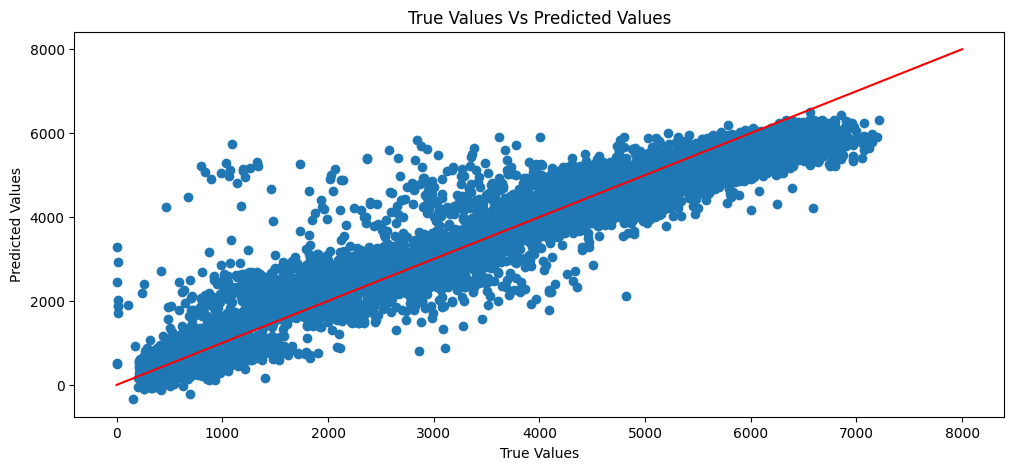

In [ ]:
# EVALUATING MODEL
evaluate_model(xgb_model, 'XG Boost')

In [ ]:
## KNN MOdel
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, Y_train)

KNeighborsRegressor()

KNN Train score:  0.89
KNNTest score:  0.82
Root Mean Squared error:  841.2086928977513
Coefficient of determination:  0.8200880486424822


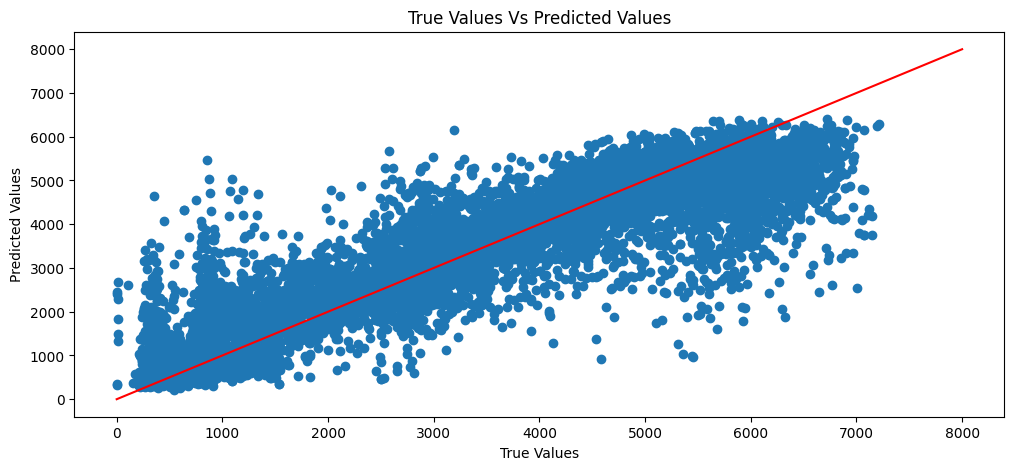

In [ ]:
#EVALUATING THE MODEL
evaluate_model(knn_model,'KNN')

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train, Y_train)

SVR(C=100, gamma=0.1)

SVR Train score:  0.69
SVRTest score:  0.69
Root Mean Squared error:  1104.5773988197045
Coefficient of determination:  0.6897978414553636


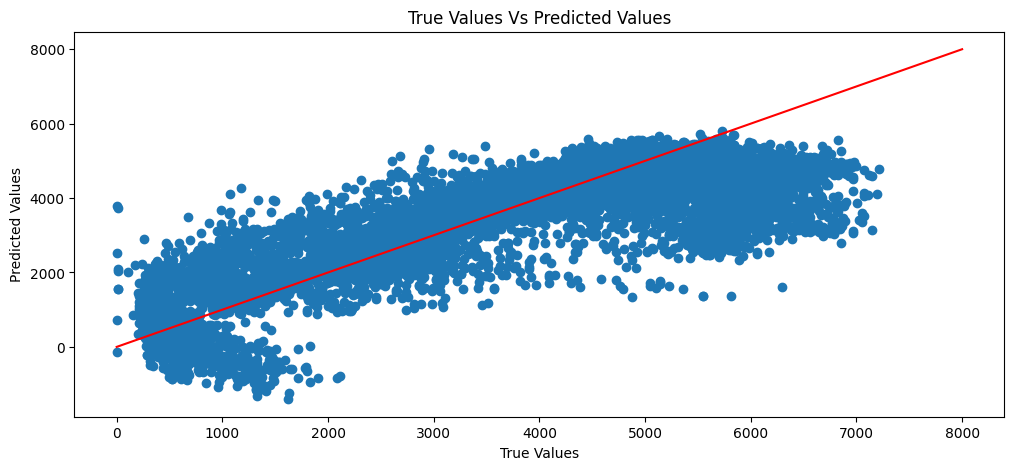

In [ ]:
#EVALUATE
evaluate_model(svr,'SVR')

In [ ]:
## Comparison between all the above algorithms
results

,RMSE
Linear Regression,1839.925970
Decision Tree,494.064197
Random Forest,440.971744
KNN,841.208693
SVR,1104.577399


In [ ]:
train_df.to_csv('Cleaned_data.csv')

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6]
}

# Define the gradient boosting regressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Perform grid search
grid_search = GridSearchCV(gb_model, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=3)
grid_search.fit(X_train, Y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100;, score=-494027.649 total time=   4.2s
[CV 2/5] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100;, score=-512430.814 total time=   3.0s
[CV 3/5] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100;, score=-522520.652 total time=   6.2s
[CV 4/5] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100;, score=-497767.998 total time=   3.0s
[CV 5/5] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100;, score=-482638.656 total time=   3.0s
[CV 1/5] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=200;, score=-401551.660 total time=   6.9s
[CV 2/5] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=200;, score=-419662.829 total time=   6.7s
[CV 3/5] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimato

In [ ]:
# Predict on the test set
predictions = grid_search.predict(X_val)

# Compute evaluation metrics
mse = mean_squared_error(Y_val, predictions)
rmse = np.sqrt(mse)

# Print the best parameters and evaluation metrics for the grid search
print("Grid Search Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Negative Mean Squared Error: {-grid_search.best_score_:.2f}")
print(f"RMSE on Test Set: {rmse:.2f}")

Grid Search Results:
Best Parameters: {'learning_rate': 0.15, 'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 300}
Best Negative Mean Squared Error: 181239.45
RMSE on Test Set: 411.37


In [ ]:
results

,RMSE
Linear Regression,1839.925970
Decision Tree,494.064197
Random Forest,440.971744
KNN,841.208693
SVR,1104.577399
